In [1]:
from utils import pipeline, plot_learning_curve, plot_confusion_matrix

In [6]:
CONFIG = dict(
    model="RNN",                     # 4 options: "RNN", "LSTM", "GRU", "BiLSTM"
    dataset="ATE",                   # 2 options: "NER", "ATE"
    embedding="Word2Vec",            # 3 options: "Word2Vec", "GloVe", "FastText"       => 4*3*2 = 24 models
    batch_size=128,
    epochs=30,
    lr=1e-2,
    criterion="NLLLoss",
    optimizer="Adam",
    hyperparams=dict(
        input_size=300,
        hidden_size=128,
        num_layers=2
    ),
    early_stopping_patience=1,
    device="cpu",
    verbose=True
)

In [7]:
# KEYS: "model", "encoder", "train_loader", "test_loader", "val_loader", "accuracy", "precision", "recall", "f1", "cf", and "loss"
run = pipeline(CONFIG)

Loading Word Embeddings...
Preprocessing Data...


 23%|███▌           | 7/30 [00:13<00:43,  1.90s/it, [Train: Loss: 0.04982, F1-Score: 0.84816], [Validation: Loss: 0.04982, F1-Score: 0.84884]]



Early Stopping at Epoch 7.
Test Loss: 0.05734
Accuracy: 0.97892, Precision: 0.81350, Recall: 0.87029, F1-Score: 0.83687


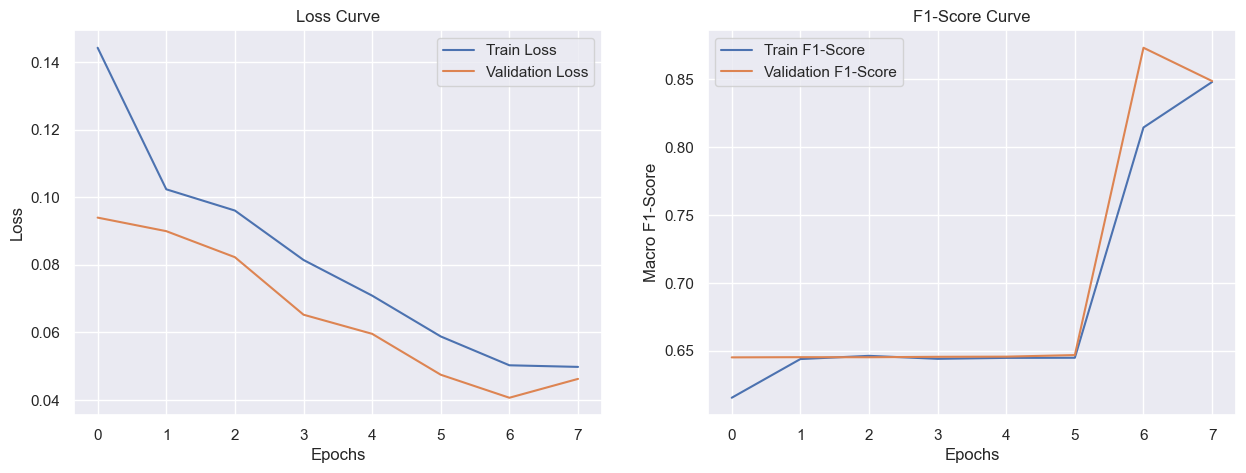

In [8]:
plot_learning_curve(run["model"])

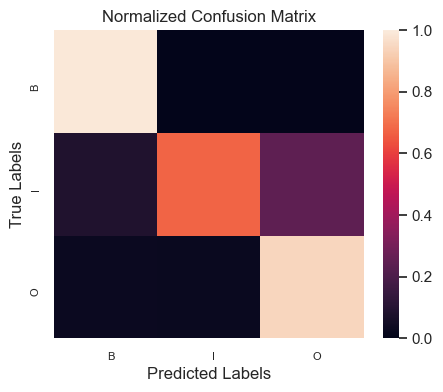

In [10]:
plot_size = (7, 6) if CONFIG["dataset"] == "NER" else (5, 4)
plot_confusion_matrix(run["cf"], labels=run["encoder"].classes_, size=plot_size)